In [1]:
from __future__ import division       
import math
#import matplotlib as mpl              ### May need to uncomment these two lines for mac osx users
#mpl.use('TkAgg')                      ###
from matplotlib import pyplot as plot
plot.style.use('ggplot')
import pandas as pandas
import numpy as numpy
%matplotlib inline

Let's load in the dataset into a pandas dataframe

In [2]:
manifest = pandas.read_csv("data/titanic_manifest.csv") # read CSV will put all the rows in the csv into a variable called df
manifest.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
manifest.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


Lets see the types that were imported on our behalf

In [4]:
manifest.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [5]:
manifest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [6]:
manifest.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


See the shape of the dataset

In [7]:
manifest.shape

(891, 12)

Here we can see the that it has 891 rows of data and 12 attributes worth of imformation.

In [8]:
len(manifest) # len is a length function.  we can get the number of rows in the data frame with len

891

In [9]:
len(manifest.columns) # this will get the number of columns

12

In [10]:
# where df.columns is 
manifest.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
manifest["Name"]

In [11]:
my_famous_passenger = manifest[manifest["Name"] == "Guggenheim, Mr. Benjamin"]
print(my_famous_passenger)

     PassengerId  Survived  Pclass                      Name   Sex   Age  \
789          790         0       1  Guggenheim, Mr. Benjamin  male  46.0   

     SibSp  Parch    Ticket  Fare    Cabin Embarked  
789      0      0  PC 17593  79.2  B82 B84        C  


In [12]:
###Lets get some information about a column

### Like mean age on the boat
manifest["Age"].mean()

### Fare
manifest["Fare"].mean()
manifest["Fare"].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [13]:
my_rich_passenger = manifest[manifest["Fare"] == 512.3292]
print(my_rich_passenger)

     PassengerId  Survived  Pclass                                Name  \
258          259         1       1                    Ward, Miss. Anna   
679          680         1       1  Cardeza, Mr. Thomas Drake Martinez   
737          738         1       1              Lesurer, Mr. Gustave J   

        Sex   Age  SibSp  Parch    Ticket      Fare        Cabin Embarked  
258  female  35.0      0      0  PC 17755  512.3292          NaN        C  
679    male  36.0      0      1  PC 17755  512.3292  B51 B53 B55        C  
737    male  35.0      0      0  PC 17755  512.3292         B101        C  


In [22]:
####Lets rearrange some columns. This would be very hard to do using a csv library and doing this by hand.
####Panda allows us to do this very intuitively
cols = list(manifest.columns.values)
print(cols)

['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


In [23]:
#Using that list above, we can create a new list, with the values rearranged.
cols = ['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'PassengerId']
rearranged_manifest = manifest[cols]
rearranged_manifest.head()

,Survived,Pclass
0,0,3
1,1,1
2,1,3
3,1,1
4,0,3


In [16]:
#### We can create new dataframes from a few attributes
sex_age_dataframe = manifest[["Sex","Age"]]
sex_age_dataframe.head()


,Sex,Age
0,male,22.0
1,female,38.0
2,female,26.0
3,female,35.0
4,male,35.0


In [ ]:
women_dataframe = df[df["Sex"] == "female"] #### Elaborate and find out what it means to df a df? Look up panda series
women_dataframe = df[df["Sex"] == "male"]

In [ ]:
women_dataframe.head()

In [ ]:
women_dataframe.head()

# Excercise 

From the Create one data frame for each Pclass.  Pclass is the passenger class.

* 1 for 1st class
* 2 for 2nd class
* 3 for 3rd class

In [26]:
#first_class
first_class = manifest[manifest["Pclass"]==1]
first_class.head

<bound method NDFrame.head of      PassengerId  Survived  Pclass  \
1              2         1       1   
3              4         1       1   
6              7         0       1   
11            12         1       1   
23            24         1       1   
27            28         0       1   
30            31         0       1   
31            32         1       1   
34            35         0       1   
35            36         0       1   
52            53         1       1   
54            55         0       1   
55            56         1       1   
61            62         1       1   
62            63         0       1   
64            65         0       1   
83            84         0       1   
88            89         1       1   
92            93         0       1   
96            97         0       1   
97            98         1       1   
102          103         0       1   
110          111         0       1   
118          119         0       1   
124          125    

In [28]:
#second_class
second_class = manifest[manifest["Pclass"]==2]
second_class.head

<bound method NDFrame.head of      PassengerId  Survived  Pclass  \
9             10         1       2   
15            16         1       2   
17            18         1       2   
20            21         0       2   
21            22         1       2   
33            34         0       2   
41            42         0       2   
43            44         1       2   
53            54         1       2   
56            57         1       2   
58            59         1       2   
66            67         1       2   
70            71         0       2   
72            73         0       2   
78            79         1       2   
84            85         1       2   
98            99         1       2   
99           100         0       2   
117          118         0       2   
120          121         0       2   
122          123         0       2   
123          124         1       2   
133          134         1       2   
134          135         0       2   
135          136    

In [29]:
#third_class
third_class = manifest[manifest["Pclass"]==3]
third_class.head

<bound method NDFrame.head of      PassengerId  Survived  Pclass  \
0              1         0       3   
2              3         1       3   
4              5         0       3   
5              6         0       3   
7              8         0       3   
8              9         1       3   
10            11         1       3   
12            13         0       3   
13            14         0       3   
14            15         0       3   
16            17         0       3   
18            19         0       3   
19            20         1       3   
22            23         1       3   
24            25         0       3   
25            26         1       3   
26            27         0       3   
28            29         1       3   
29            30         0       3   
32            33         1       3   
36            37         1       3   
37            38         0       3   
38            39         0       3   
39            40         1       3   
40            41    

Observations: There were many people in third class. More so than the other two class of passengers combined.

In [36]:
print ("# 1st",len(first_class))
print ("# 2nd",len(second_class))
print ("# 3rd",len(third_class))


# 1st 216
# 2nd 184
# 3rd 491


We can create new attributes from other attributes.

Since we know that Parch is the number of parents or children onboard, and SibSp is the number of siblings or spouses, we could collect those together as a FamilySize

In [39]:
manifest["FamilySize"] = manifest["SibSp"] + manifest["Parch"]
manifest.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [44]:
# create a new attribute combining the name with the cabin
manifest["Cabin"] = manifest["Cabin"].fillna(' ') #replaces the original NaN cabin names with a blank space
manifest["Name_Cabin"] = manifest["Name"] + manifest["Cabin"]

manifest.tail()
#manifest["Name_Cabin"] = # what should go here if I want to format the data like this "<name> - <cabin>" (name dash cabin)
#manifest.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Name_Cabin
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,,S,0,"Montvila, Rev. Juozas"
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S,0,"Graham, Miss. Margaret EdithB42"
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,,S,3,"Johnston, Miss. Catherine Helen ""Carrie"""
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C,0,"Behr, Mr. Karl HowellC148"
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,,Q,0,"Dooley, Mr. Patrick"


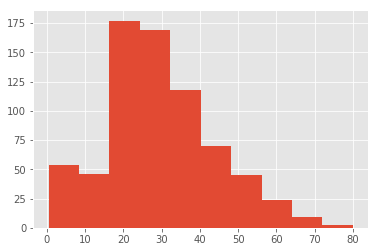

In [45]:
manifest["Age"].hist()

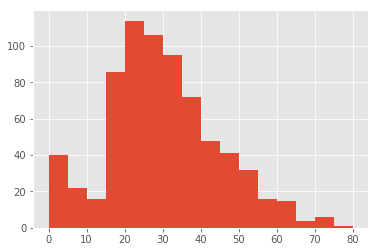

In [46]:
manifest["Age"].dropna().hist(bins=16, range=(0,80))

In [ ]:
manifest["Fare"].hist()

In [ ]:
plot.scatter(manifest['Fare'], manifest['Survived']) #scatter is a function of x-axis values and y-axis values
plot.show()

In [83]:
### Side step
# Lets create a random numbers scatter plot

rando_dictionary = {'one' : numpy.random.rand(10), # 10 random numbers
     'two' : numpy.random.rand(10)}
print(rando_dictionary)

{'one': array([ 0.00199487,  0.83969045,  0.4416073 ,  0.29033656,  0.04153814,
        0.70683242,  0.22083826,  0.25386163,  0.48769473,  0.81199931]), 'two': array([ 0.27763281,  0.80559853,  0.5901159 ,  0.33630515,  0.00607924,
        0.85451725,  0.95352112,  0.49376034,  0.41613081,  0.11816711])}


In [86]:
rando_dataframe = pandas.DataFrame(rando_dictionary) # create a new data frame with the dictionary of random numbers
rando_dataframe.  # display the top rows in rando_dataframe

,one,two
0,0.448949,0.097787
1,0.879273,0.946836
2,0.159350,0.012555
3,0.569011,0.959735
4,0.127075,0.282426


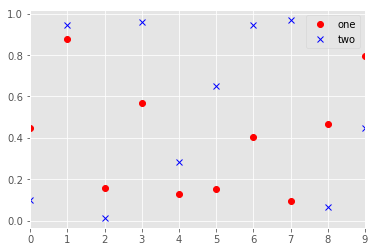

In [87]:
rando_dataframe.plot(style=['ro','bx']) #red Os and blue Xs

In [47]:
##### Back to the titanic. So we have our original dataset
manifest.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Name_Cabin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,,S,1,"Braund, Mr. Owen Harris"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,,S,0,"Heikkinen, Miss. Laina"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)C123"
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,,S,0,"Allen, Mr. William Henry"


In [48]:
#### Lets group them by gender
grouped_by_sex = manifest.groupby(["Sex"])
grouped_by_sex.describe()

Age  FamilySize        Fare       Parch  PassengerId  \
Sex                                                                         
female count  261.000000  314.000000  314.000000  314.000000   314.000000   
       mean    27.915709    1.343949   44.479818    0.649682   431.028662   
       std     14.110146    1.755733   57.997698    1.022846   256.846324   
       min      0.750000    0.000000    6.750000    0.000000     2.000000   
       25%     18.000000    0.000000   12.071875    0.000000   231.750000   
       50%     27.000000    1.000000   23.000000    0.000000   414.500000   
       75%     37.000000    2.000000   55.000000    1.000000   641.250000   
       max     63.000000   10.000000  512.329200    6.000000   889.000000   
male   count  453.000000  577.000000  577.000000  577.000000   577.000000   
       mean    30.726645    0.665511   25.523893    0.235702   454.147314   
       std     14.678201    1.478106   43.138263    0.612294   257.486139   
       min      0.420000    0.000000    0.000000    0.000000     1.000000   
       25%     21.000000    0.000000    7.895800    0.000000   222.000000   
       50%     29.000000    0.000000   10.500000    0.000000   464.000000   
       75%     39.000000    1.000000   26.550000    0.000000   680.000000   
       max     80.000000   10.000000  512.329200    5.000000   891.000000   

                  Pclass       SibSp    Survived  
Sex                                               
female count  314.000000  314.000000  314.000000  
       mean     2.159236    0.694268    0.742038  
       std      0.857290    1.156520    0.438211  
       min      1.000000    0.000000    0.000000  
       25%      1.000000    0.000000    0.000000  
       50%      2.000000    0.000000    1.000000  
       75%      3.000000    1.000000    1.000000  
       max      3.000000    8.000000    1.000000  
male   count  577.000000  577.000000  577.000000  
       mean     2.389948    0.429809    0.188908  
       std      0.813580    1.061811    0.391775  
       min      1.000000    0.000000    0.000000  
       25%      2.000000    0.000000    0.000000  
       50%      3.000000    0.000000    0.000000  
       75%      3.000000    0.000000    0.000000  
       max      3.000000    8.000000    1.000000

In [50]:
#### Lets group them by gender and passenger class
grouped_by_sex_and_pclass = manifest.groupby(["Sex", "Pclass"]) # was "what goes here? fill it in yourself
grouped_by_sex_and_pclass.describe()

Age  FamilySize        Fare       Parch  \
Sex    Pclass                                                         
female 1      count   85.000000   94.000000   94.000000   94.000000   
              mean    34.611765    1.010638  106.125798    0.457447   
              std     13.612052    1.102243   74.259988    0.728305   
              min      2.000000    0.000000   25.929200    0.000000   
              25%     23.000000    0.000000   57.244800    0.000000   
              50%     35.000000    1.000000   82.664550    0.000000   
              75%     44.000000    1.000000  134.500000    1.000000   
              max     63.000000    5.000000  512.329200    2.000000   
       2      count   74.000000   76.000000   76.000000   76.000000   
              mean    28.722973    1.092105   21.970121    0.605263   
              std     12.872702    1.190828   10.891796    0.833930   
              min      2.000000    0.000000   10.500000    0.000000   
              25%     22.250000    0.000000   13.000000    0.000000   
              50%     28.000000    1.000000   22.000000    0.000000   
              75%     36.000000    2.000000   26.062500    1.000000   
              max     57.000000    5.000000   65.000000    3.000000   
       3      count  102.000000  144.000000  144.000000  144.000000   
              mean    21.750000    1.694444   16.118810    0.798611   
              std     12.729964    2.232242   11.690314    1.237976   
              min      0.750000    0.000000    6.750000    0.000000   
              25%     14.125000    0.000000    7.854200    0.000000   
              50%     21.500000    1.000000   12.475000    0.000000   
              75%     29.750000    2.000000   20.221875    1.000000   
              max     63.000000   10.000000   69.550000    6.000000   
male   1      count  101.000000  122.000000  122.000000  122.000000   
              mean    41.281386    0.590164   67.226127    0.278689   
              std     15.139570    0.951329   77.548021    0.658853   
              min      0.920000    0.000000    0.000000    0.000000   
              25%     30.000000    0.000000   27.728100    0.000000   
              50%     40.000000    0.000000   41.262500    0.000000   
              75%     51.000000    1.000000   78.459375    0.000000   
              max     80.000000    5.000000  512.329200    4.000000   
       2      count   99.000000  108.000000  108.000000  108.000000   
              mean    30.740707    0.564815   19.741782    0.222222   
              std     14.793894    0.888905   14.922235    0.517603   
              min      0.670000    0.000000    0.000000    0.000000   
              25%     23.000000    0.000000   12.331250    0.000000   
              50%     30.000000    0.000000   13.000000    0.000000   
              75%     36.750000    1.000000   26.000000    0.000000   
              max     70.000000    3.000000   73.500000    2.000000   
       3      count  253.000000  347.000000  347.000000  347.000000   
              mean    26.507589    0.723343   12.661633    0.224784   
              std     12.159514    1.751499   11.681696    0.623404   
              min      0.420000    0.000000    0.000000    0.000000   
              25%     20.000000    0.000000    7.750000    0.000000   
              50%     25.000000    0.000000    7.925000    0.000000   
              75%     33.000000    0.000000   10.008300    0.000000   
              max     74.000000   10.000000   69.550000    5.000000   

                     PassengerId       SibSp    Survived  
Sex    Pclass                                             
female 1      count    94.000000   94.000000   94.000000  
              mean    469.212766    0.553191    0.968085  
              std     247.476723    0.665865    0.176716  
              min       2.000000    0.000000    0.000000  
              25%     293.500000    0.000000    1.000000  
              50%     447.000000    0.000000    1.000000  
     

In [51]:
#### Lets group them by gender and passenger class and who survived
grouped_by_sex_pclass_survived = manifest.groupby(["Sex", "Pclass", "Survived"]) # fill it in yourself
grouped_by_sex_pclass_survived.describe()

Age  FamilySize        Fare       Parch  \
Sex    Pclass Survived                                                         
female 1      0        count    3.000000    3.000000    3.000000    3.000000   
                       mean    25.666667    2.000000  110.604167    1.333333   
                       std     24.006943    1.732051   70.920264    1.154701   
                       min      2.000000    0.000000   28.712500    0.000000   
                       25%     13.500000    1.500000   90.131250    1.000000   
                       50%     25.000000    3.000000  151.550000    2.000000   
                       75%     37.500000    3.000000  151.550000    2.000000   
                       max     50.000000    3.000000  151.550000    2.000000   
              1        count   82.000000   91.000000   91.000000   91.000000   
                       mean    34.939024    0.978022  105.978159    0.428571   
                       std     13.223014    1.074741   74.738897    0.701472   
                       min     14.000000    0.000000   25.929200    0.000000   
                       25%     23.250000    0.000000   57.489600    0.000000   
                       50%     35.000000    1.000000   82.170800    0.000000   
                       75%     44.000000    1.000000  134.075000    1.000000   
                       max     63.000000    5.000000  512.329200    2.000000   
       2      0        count    6.000000    6.000000    6.000000    6.000000   
                       mean    36.000000    0.666667   18.250000    0.166667   
                       std     12.915107    0.816497    6.969577    0.408248   
                       min     24.000000    0.000000   10.500000    0.000000   
                       25%     26.250000    0.000000   13.000000    0.000000   
                       50%     32.500000    0.500000   17.000000    0.000000   
                       75%     42.500000    1.000000   24.750000    0.000000   
                       max     57.000000    2.000000   26.000000    1.000000   
              1        count   68.000000   70.000000   70.000000   70.000000   
                       mean    28.080882    1.128571   22.288989    0.642857   
                       std     12.764693    1.214901   11.140937    0.851864   
                       min      2.000000    0.000000   10.500000    0.000000   
                       25%     21.750000    0.000000   13.000000    0.000000   
                       50%     28.000000    1.000000   23.000000    0.000000   
...                                  ...         ...         ...         ...   
male   2      0        std     12.158125    0.806415   15.720548    0.436436   
                       min     16.000000    0.000000    0.000000    0.000000   
                       25%     24.750000    0.000000   11.500000    0.000000   
                       50%     30.500000    0.000000   13.000000    0.000000   
                       75%     39.000000    1.000000   26.000000    0.000000   
                       max     70.000000    3.000000   73.500000    2.000000   
              1        count   15.000000   17.000000   17.000000   17.000000   
                       mean    16.022000    1.176471   21.095100    0.647059   
                       std     19.547122    1.074436    9.832542    0.701888   
                       min      0.670000    0.000000   10.500000    0.000000   
                       25%      1.000000    0.000000   13.000000    0.000000   
                       50%      3.000000    2.000000   18.750000    1.000000   
                       75%     31.500000    2.000000   26.000000    1.000000   
                       max     62.000000    3.000000   39.000000    2.000000   
       3      0        count  215.000000  300.000000  300.000000  300.000000   
                       mean    27.255814    0.736667   12.204469    0.213333   
                       std     12.135707    1.827143   10.984904    0.629133   
                       min      1.000

In [ ]:
manifest.groupby(["Sex", "Pclass"]).count() ### Count of records in each group throughout a dataset

# Logistic Regression

In [ ]:
# we can use these libraries.  so let's import them first

import statsmodels.api as stats
import pylab as pylab


In [ ]:
print(manifest.columns)

In [ ]:
# Create a new temporary data frame
temp_manifest = manifest

def gender_to_numeric(x):  # convert sex value to 0 for male and 1 for female because we do logistical regressions on 1s and 0s
    if x == "male":
        return 0
    else:
        return 1

In [71]:
temp_manifest["Sex"] = temp_manifest["Sex"].apply(gender_to_numeric) 
# ths will run each sex value through the function to return a new data frame
temp_manifest.head()

,Survived,Age,Sex,Pclass
0,0,22.0,1,3
1,1,38.0,1,1
2,1,26.0,1,3
3,1,35.0,1,1
4,0,35.0,1,3


In [74]:
temp_manifest = temp_manifest[["Survived", "Age","Sex", "Pclass"]]
temp_manifest = temp_manifest.dropna()
# remember how to display a dataframe? do it here
______

In [76]:
train_cols = temp_manifest.columns[1:] # do you remember what this is?  we saw this yesterday
train_cols

Index(['Age', 'Sex', 'Pclass'], dtype='object')

In [ ]:
logistical_regression = stats.Logit(temp_manifest['Survived'], temp_manifest[train_cols])

#Fit the model
survived_regression = logistical_regression.fit()

In [ ]:
print(survived_regression.summary())

In [ ]:
print(survived_regression.conf_int())